In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problem 2: Exponentially Weighted k-Nearest Neighbors

The **exponentially weighted knn** method uses all of the neighbors of a new point $x_{\rm new}$ rather than only the nearest $k$ neighbors. 
Each neighbor is assigned a weight, according to its distance to $x_{\rm new}$.

The weights are a function of a constant $\alpha$, a number bounded by zero and one.
The weight of the $i$th nearest neighbor is given by

$$
w_i = \alpha(1-\alpha)^{i-1} \quad \mbox{for }i=1,2,\ldots,m
$$

Large values of $\alpha$ place more weight on the nearest neighbors and produce weights that decay rapidly to zero, whereas the rate of decay is slower for smaller values of $\alpha$.
Notice that the nearest neighbor ($i=1$) receives the weight $w_1=\alpha$.

## Part 1

Implement the exponentially weighted knn method

In [3]:
def exp_knn_classifier(X,y,X_new,alpha):
    
    from sklearn.metrics import pairwise_distances
    
    # number of datapoints
    m,_ = X.shape
    m_new,_ = X_new.shape
    
    # classes and number of classes
    labels = np.unique(y)
    n_classes = len(labels)
    
    # distance matrix
    dist = pairwise_distances(X,X_new)
    
    # sort points by distance
    knn = np.argsort(dist,axis=0)
    
    # initialize prediction vector
    y_pred = np.zeros(m_new).astype(int)
    
    # loop over new points
    for i in range(m_new):
        # labels
        nearest_labels = y[knn[:,i]]
        # weights
        w = np.array([alpha*(1-alpha)**(i) for i in range(m)])
        # prediction
        y_pred[i] = np.argmax(np.bincount(nearest_labels, minlength=n_classes, weights=w))
    return y_pred

## Part 2: The MNIST dataset revisited

In [4]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits.csv'
data = pd.read_csv(url)
data.head(5)

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [8]:
X = data.iloc[:,0:784].to_numpy() # pixels
y = data['label'].to_numpy() # labels

**Part 2-a:** Split the dataset into training and validation sets.

In [17]:
# training (75%), validation (25%)
m = len(y)
X_train, X_val = X[0:3*m//4], X[3*m//4:m]
y_train, y_val = y[0:3*m//4], y[3*m//4:m]

**Part 2-b:** Use the validation set to tune-in the parameter $\alpha$.

Text(0.5, 0, 'alpha')

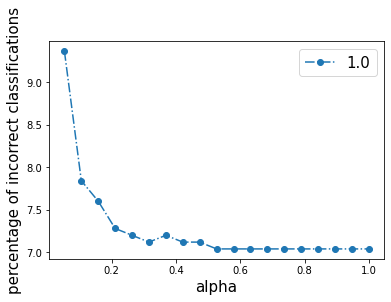

In [33]:
alphas = np.linspace(0,1,20)

pct_incorrect = np.zeros(len(alphas))
# loop over k values
for i,alpha in enumerate(alphas):
    # exp weighted knn classifier
    y_val_pred = exp_knn_classifier(X_train,y_train,X_val,alpha)
    # percentage of incorrect classification
    pct_incorrect[i] = 100*np.mean(y_val!=y_val_pred)
plt.plot(alphas[1:], pct_incorrect[1:],'o-.', label=alpha)
plt.legend(fontsize=15)
plt.ylabel('percentage of incorrect classifications', fontsize=15)
plt.xlabel('alpha', fontsize=15)


**Part 2-c:** Test your classifier on the following test set

In [25]:
# load test data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits_test.csv'
test_data = pd.read_csv(url)

In [26]:
X_test = test_data.iloc[:,0:784].to_numpy() # pixels
y_test = test_data['label'].to_numpy() # labels

In [35]:
alpha = 0.5
y_test_pred = exp_knn_classifier(X_train,y_train,X_test,alpha)
# percentage of correct classifications
100*np.mean(y_test==y_test_pred)

93.30000000000001